## Regresion lineal Simple

# Índice

- 1. [Importar librerías](#importar-librerias)
- 2. [Carga Archivos](#Carga-de-datos)
- 3. [HeatMap Correlaciones](#Tabla-de-correlaciones)
- 4. [Analsis Bivariado](#dos-variables)
    - 4.1. [Indentificación de Modelo Lineal](#identificando-modelo-lineal)
        - 4.1.1. [Prueba F](#testf)
        - 4.1.2. [Prueba T](#testt)
        - 4.1.3. [Recta de regresión](#recta)
    - 4.2. [Validación de suspuesto (grafico)](#validacion-supuestos-grafico)
        - 4.2.1. [Independencia](#intependiencia-grafico)
        - 4.2.2. [Normalidad](#normalidad-grafico)
        - 4.2.3. [Media cero](#mediacero-grafico)
        - 4.2.4. [Homocedasticidad](#homocedasticidad-grafico)        
    - 4.3. [Validación de suspuesto (teorico)](#validacion-supuestos-teorico)
        - 4.3.1. [Independencia (Durbin-Watson Test)](#intependiencia-teorico)
        - 4.3.2. [Normalidad, Media cero (Jarque-Bera Test)](#normalidad-mediacero-teorico)
        - 4.3.3. [Homocedasticidad (Breusch-pagan Test)](#homocedasticidad-teorico)
          

In [304]:
#! pip install xlrd
#!pip install scikit-learn

# 1. Importar librerías <a id="importar-librerias"></a>

In [305]:
import pandas as pd
import numpy as np #Paquete para manejar arreglos (vector . arreglo unidimensional - matrix - arreglo bidimensional)
import matplotlib.pyplot as plt
import json
import seaborn as sns
from scipy import stats
import imageio
import imageio.v2 as imageio
from scipy.stats import pearsonr,spearmanr, kendalltau
import statsmodels.api as sms
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

# 2.  Carga de datos<a id="Carga-de-datos"></a>

In [306]:
medifis = pd.read_excel("Datos/datos.xls", sheet_name="Medifis", header=2)

# 3. Tabla de correlaciones <a id="Tabla-de-correlaciones"></a>

<Axes: >

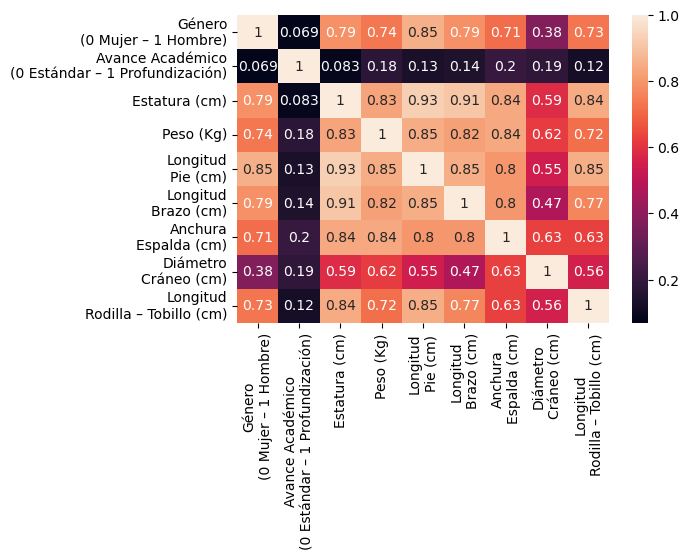

In [307]:
plt.figure(figsize = (6,4))
sns.heatmap(medifis.corr(),annot = True)

# 4. Analisis dos variables <a id="dos-variables"></a>

In [308]:
#vamos a hacer un analisis de dos variables, en este caso Estatura contra Longitud del pie.

$$Modelo Teorico$$
$$y_i = \beta_0 +\beta_1 x_i + e_i$$

$$Modelo Ajustado$$
$$\hat{y}_i = \hat{\beta}_0 +\hat{\beta}_1 x_i$$

In [309]:
medifis.columns

Index(['Género\n(0 Mujer – 1 Hombre)',
       'Avance Académico\n(0 Estándar – 1 Profundización)', 'Estatura (cm)',
       'Peso (Kg)', 'Longitud\nPie (cm)', 'Longitud\nBrazo (cm)',
       'Anchura\nEspalda (cm)', 'Diámetro\nCráneo (cm)',
       'Longitud\nRodilla – Tobillo (cm)'],
      dtype='object')

In [310]:
# Seleccionamos nuestro X y Y
y = medifis["Estatura (cm)"]
x = medifis["Longitud\nPie (cm)"]

In [311]:
#Matriz de diseños
X = sms.add_constant(x) #Agregando el vector de 1's (como una columna inicial) para crear la matriz de diseño
model = sms.OLS(y,X) ## Modelo de regresion lineal por minumos cuadrados 
result = model.fit() ## ajustamos el modelo

### 4.1. Identificando Modelo Lineal <a id="identificando-modelo-lineal"></a>
- 1. #### F Test asociado <a id="testf"></a>
    - **Interpretación**: 
        - si el *p-value* asociado a la prueba F **Menor a 0.05** (significancia), **Rechazo H0**, y concluyo que hay significancia estadistica (ó que la variable independiente tiene efecto significativo sobre la variable dependiente). <font color='green'>==DESEADO== </font>
        - En caso contrario, (cuando el *p-value* es **mayor o igual a 0.05** (significancia) **No rechazo H0**, por lo tanto el modelo **NO ES SIGNIFICATIVO** o **NO HAY MODELO LINEAL**
     - Prueba de hipotesis
        - $H_0 : \beta_1 = 0$
        - $H_a : \beta_1 \neq 0$
    
    
    $$ F = \frac{MSE}{MSR}$$ 
    
    - MSE es el error cuadrático medio (mean squared error)
    - MSR es la suma de los cuadrados de la regresión dividida por los grados de libertad de la regresión.
    
    
- 2. #### T Test asociado <a id="testt"></a>
    - **Interpretación**:
        - si el *p-value* asociado ($P > |t|$) **Menor a 0.05** (significancia), **Rechazo H0**, por lo tanto el coeficiente asociado **ES SIGNIFICATIVO** (Tenemos suficiente evidencia para afirmar que hay una relacion lineal entre las variables). <font color='green'>==DESEADO== </font>
        - si el *p-value* asociado ** Mayor o igual a 0.05** (significancia), **No Rechazo H0**, por tanto, el coeficiente no es significativo (No tenemos evidencia suficiente para afirmar que hay una relacion lineal entre las variable), por lo mismo, eliminamos esa variable del modelo.
        
        - nota: La prueba de significancia t: puede ser equivalente a la prueba F en modelo simple, pero no en multivariado.
  - Prueba de hipotesis
    - $H_0 : \beta_1 = 0$
    - $H_a : \beta_1 \neq 0$     

- 3. Recta de regresion <a id="recta"></a>
    - $\hat{y}_i = \hat{\beta}_0 +\hat{\beta}_1 x_i$
    - $\hat{y}_i = 40.0119 + 3.3033 x$
    

### 4.2. Validación de suspuestos del modelo (Grafica) <a id="validacion-supuestos-grafico"></a>
- 4.Validacion de supuestos del modelo

#### Independencia  <a id="intependiencia-grafico"></a>

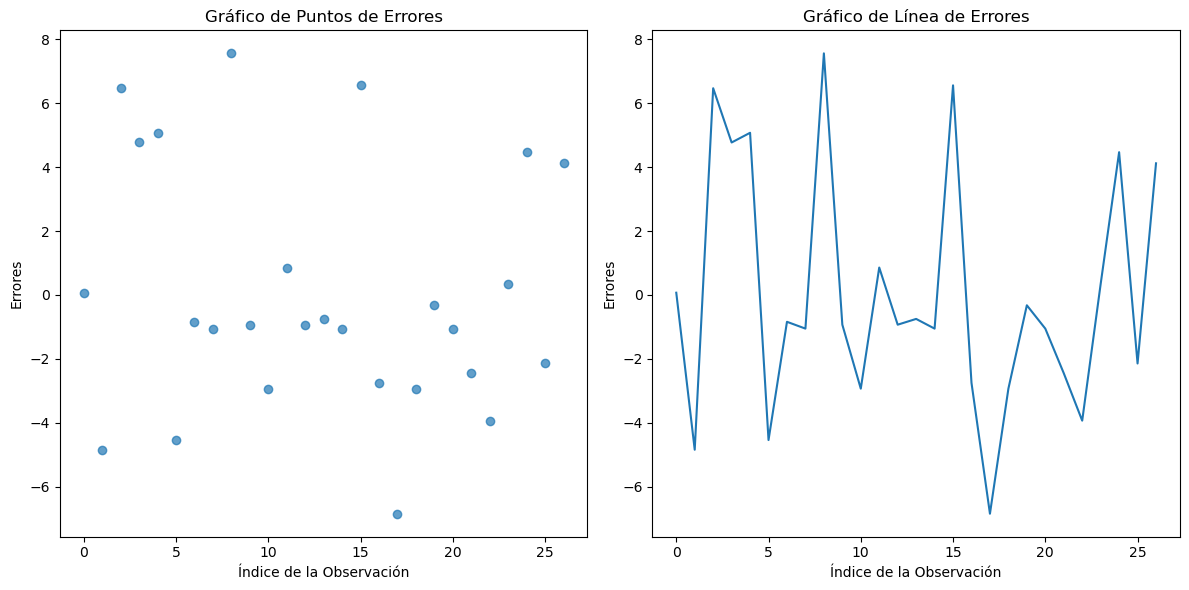

In [312]:
#plt.plot(result.resid[:-1],result.resid[1:],'.') #Grafico scatter plot de autocorrelaciones
plt.figure(figsize=(12, 6))

# Gráfico de puntos de los errores
plt.subplot(1, 2, 1)
plt.scatter(range(len(result.resid)), result.resid, alpha=0.7)
plt.xlabel('Índice de la Observación')
plt.ylabel('Errores')
plt.title('Gráfico de Puntos de Errores')

# plt.plot(result.resid) # lineas
# Gráfico de línea de los errores
plt.subplot(1, 2, 2)
plt.plot(result.resid)
plt.xlabel('Índice de la Observación')
plt.ylabel('Errores')
plt.title('Gráfico de Línea de Errores')

plt.tight_layout()
plt.show()

## Conclusión
Lectura: No hay hay patrones ni tendencias estacionales o ciclicas

#### Normalidad <a id="normalidad-grafico"></a>

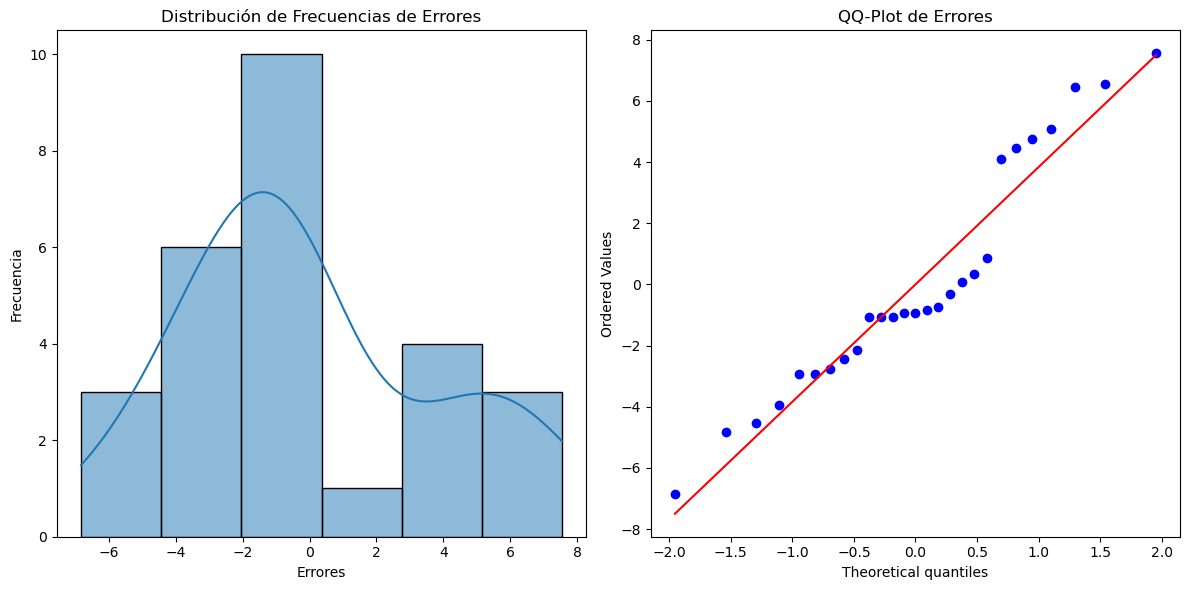

In [315]:
# Distribución de Frecuencias
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(result.resid, kde=True)
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.title('Distribución de Frecuencias de Errores')

# QQ-Plot
plt.subplot(1, 2, 2)
stats.probplot(result.resid, plot=plt)
plt.title('QQ-Plot de Errores')

plt.tight_layout()
plt.show()

## Conclusión
hay una distribucion que tiende a normal y losp untos (cuantiles de los errores) estan cerca a la linea por tanto hay distribucion normal

#### Media Cero <a id="mediacero-grafico"></a>

C:\Users\CARLOS\AppData\Local\Temp\ipykernel_9972\2899577349.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(result.resid, shade=True)


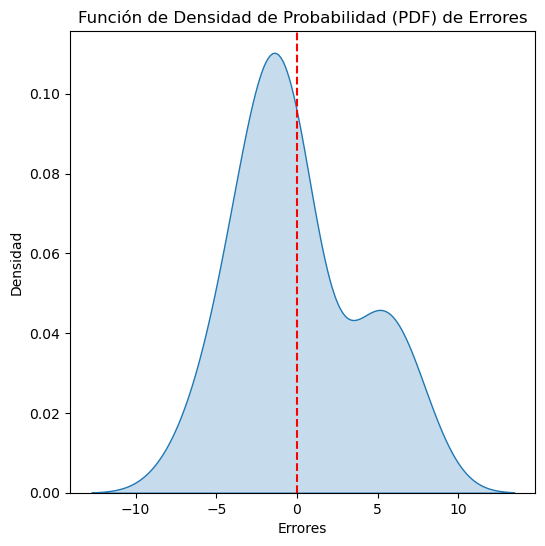

In [316]:
# Función de Densidad de Probabilidad (PDF)
plt.figure(figsize=(6, 6))
sns.kdeplot(result.resid, shade=True)
plt.xlabel('Errores')
plt.ylabel('Densidad')
plt.axvline(x=0, color='r', linestyle='--', label='Media Cero')  # Corrección aquí
plt.title('Función de Densidad de Probabilidad (PDF) de Errores')
plt.show()

## Conclusión
se puede ver que hay una distribucion normal con media cero aproximada

#### Homocedasticidad: <a id="homocedasticidad-grafico"></a>

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

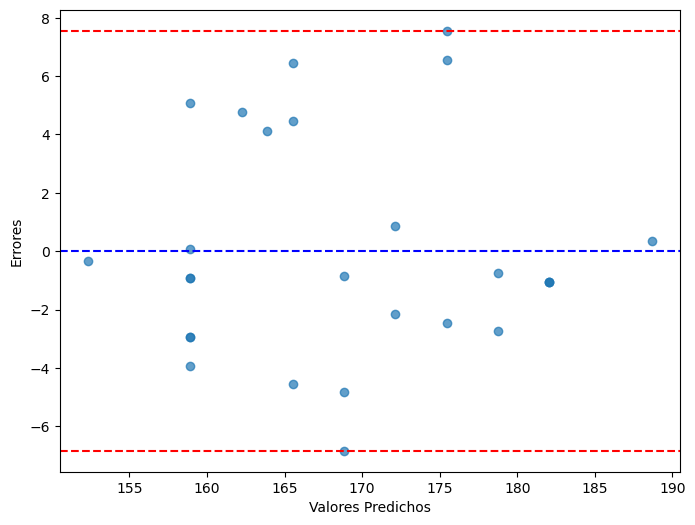

In [317]:
# Obtener los valores predichos y los errores
fitted_values = result.fittedvalues
residuals = result.resid

# Calcular los mínimos y máximos de los errores en relación con los valores predichos
min_residuals = np.min(residuals)
max_residuals = np.max(residuals)

# Comparación de variabilidad de los residuales
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(y=0, color='b', linestyle='--', label='Media Cero')
plt.axhline(y=min_residuals, color='r', linestyle='--', label='Mínimos Errores')
plt.axhline(y=max_residuals, color='r', linestyle='--', label='Máximos Errores')
plt.xlabel('Valores Predichos')
plt.ylabel('Errores')
plt.title


## Conclusión
No se ven patrones ciclicos o conos o lineales

### Graficos agrupados 

C:\Users\CARLOS\AppData\Local\Temp\ipykernel_9972\2526789821.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, ax=axs[2, 0])


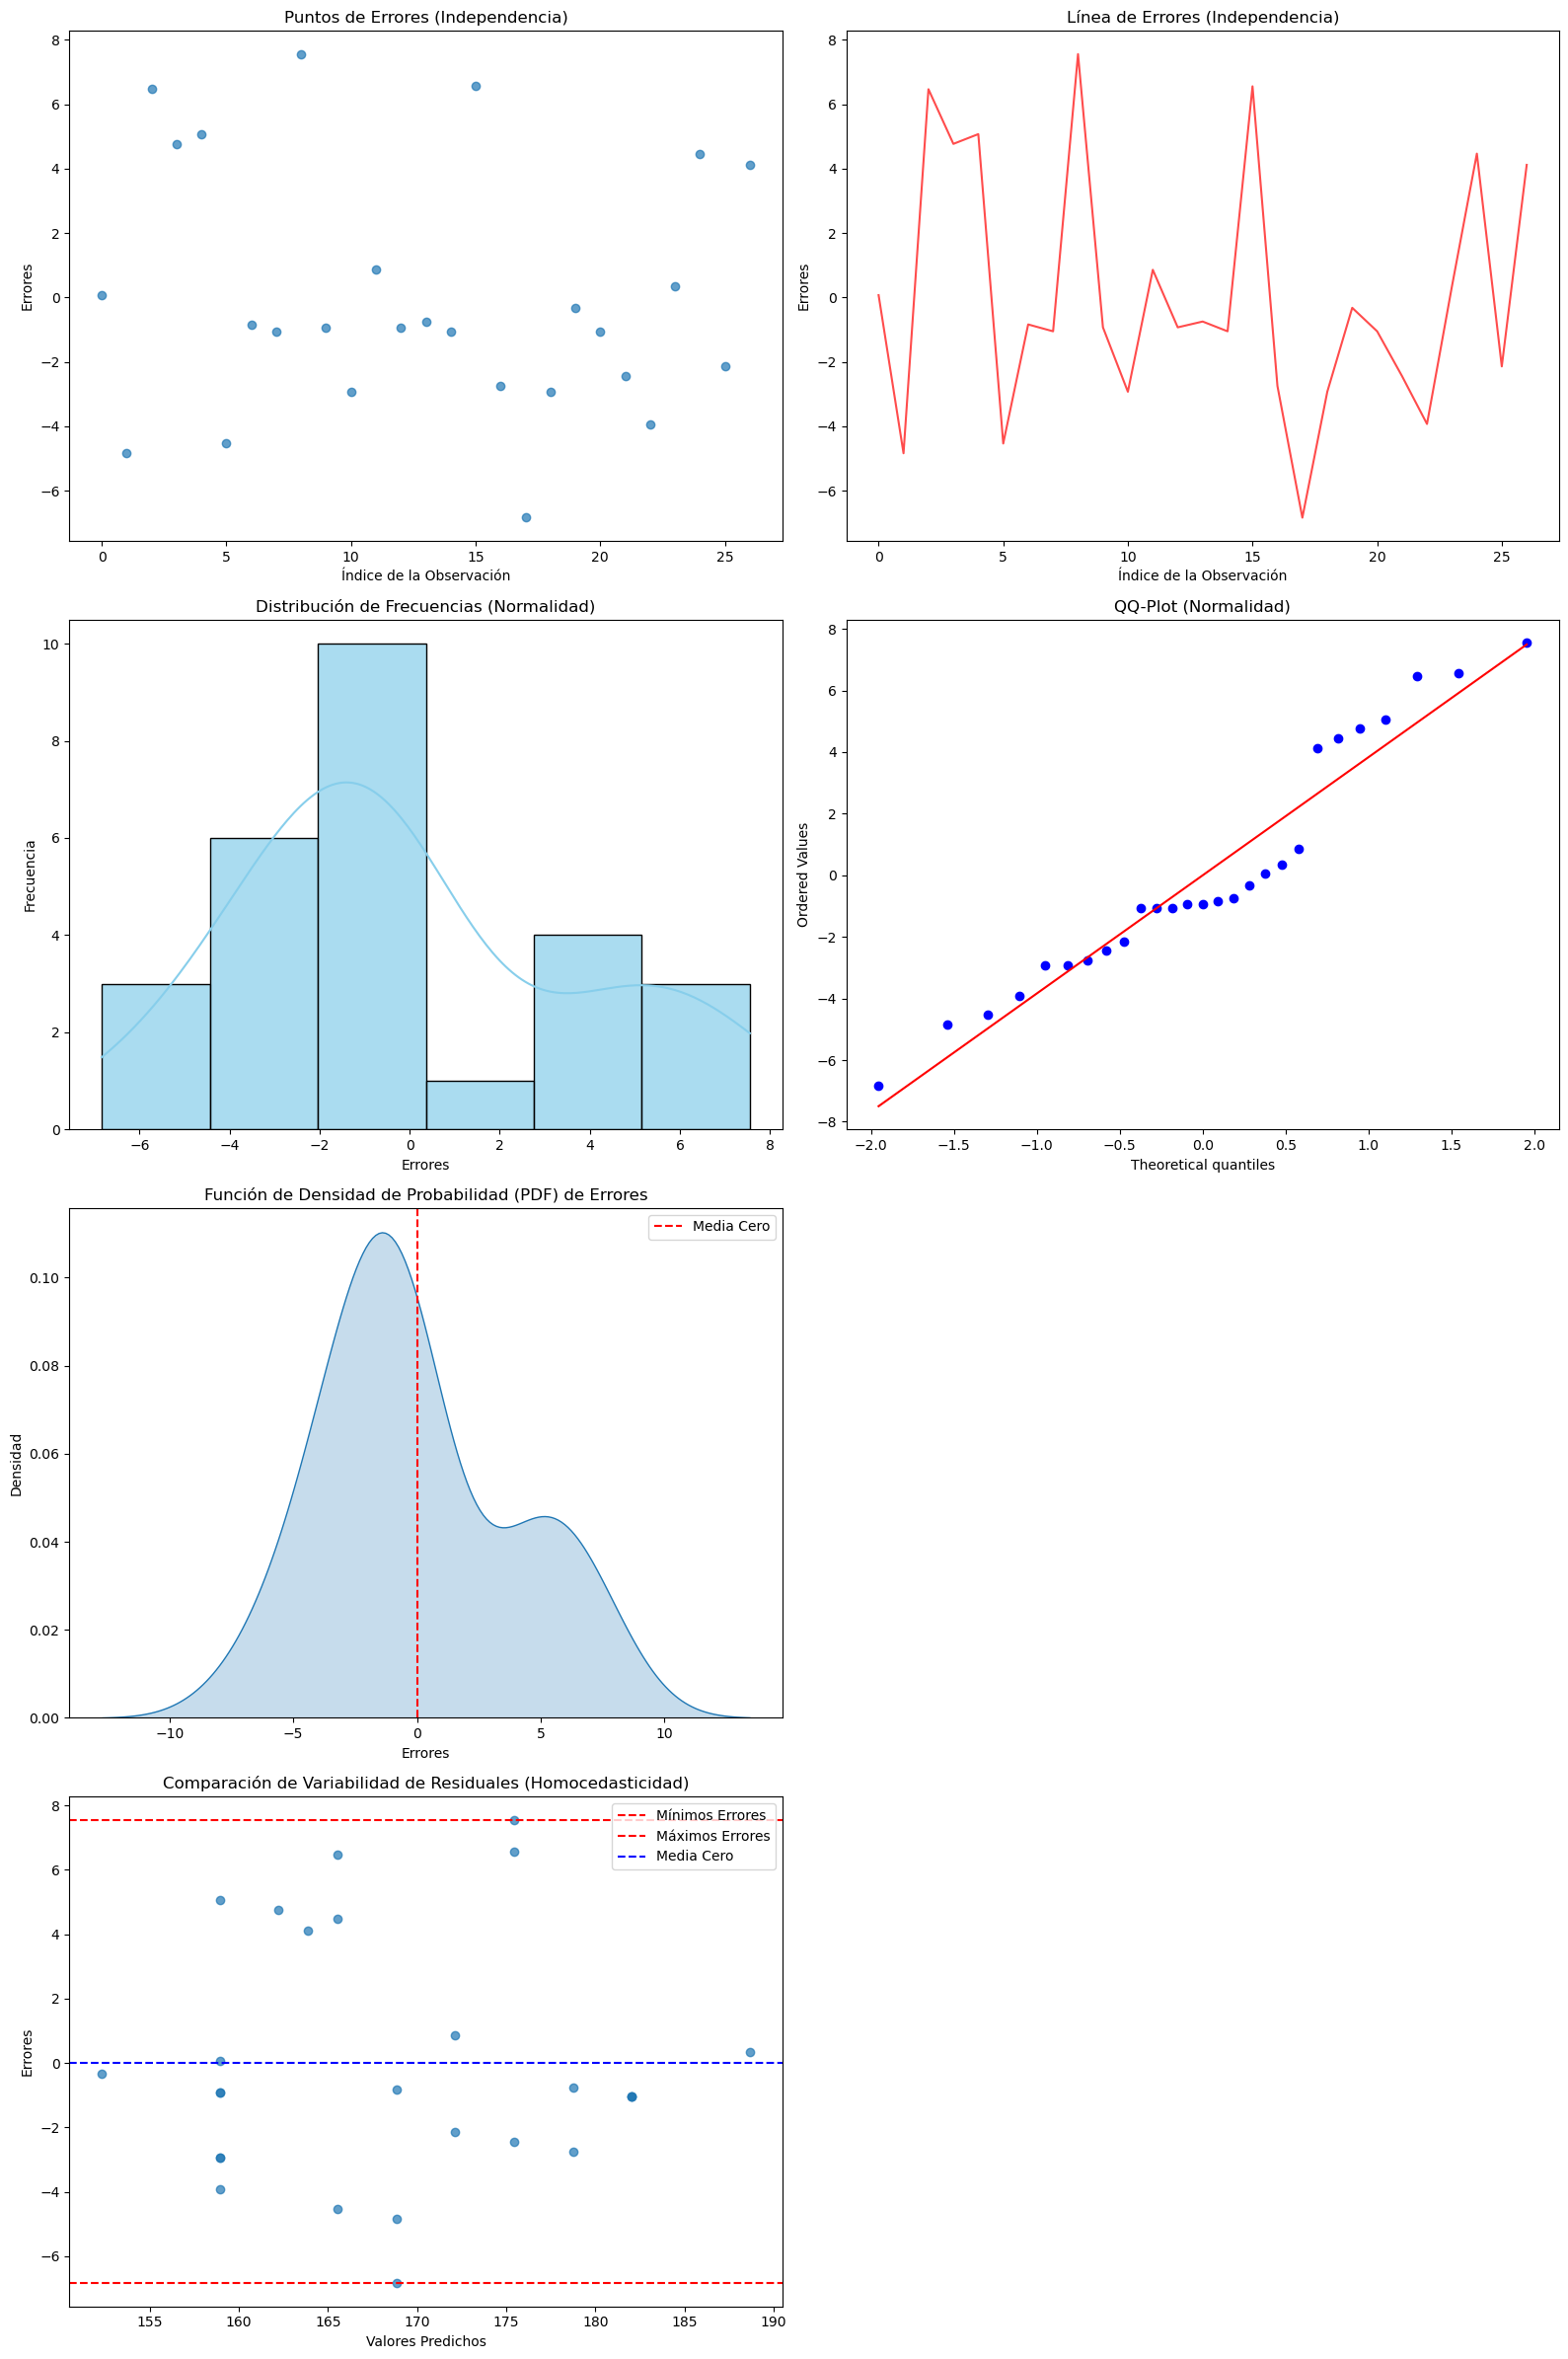

In [318]:
# Obtener los valores predichos y los errores
fitted_values = result.fittedvalues
residuals = result.resid
min_residuals = np.min(residuals)
max_residuals = np.max(residuals)

# Crear subplots
fig, axs = plt.subplots(4, 2, figsize=(16, 24))

# 1. Independencia
axs[0, 0].scatter(range(len(residuals)), residuals, alpha=0.7)
axs[0, 0].set_xlabel('Índice de la Observación')
axs[0, 0].set_ylabel('Errores')
axs[0, 0].set_title('Puntos de Errores (Independencia)')

axs[0, 1].plot(residuals, color='r', alpha=0.7)
axs[0, 1].set_xlabel('Índice de la Observación')
axs[0, 1].set_ylabel('Errores')
axs[0, 1].set_title('Línea de Errores (Independencia)')

# 2. Normalidad
#axs[1, 0].hist(residuals, bins=20, color='skyblue', alpha=0.7)
sns.histplot(result.resid, kde=True, bins=6, color='skyblue', alpha=0.7, ax=axs[1, 0])
axs[1, 0].set_xlabel('Errores')
axs[1, 0].set_ylabel('Frecuencia')
axs[1, 0].set_title('Distribución de Frecuencias (Normalidad)')

stats.probplot(residuals, plot=axs[1, 1])
axs[1, 1].set_title('QQ-Plot (Normalidad)')

# 3. Media Cero
sns.kdeplot(residuals, shade=True, ax=axs[2, 0])
axs[2, 0].axvline(x=0, color='r', linestyle='--', label='Media Cero')
axs[2, 0].set_xlabel('Errores')
axs[2, 0].set_ylabel('Densidad')
axs[2, 0].set_title('Función de Densidad de Probabilidad (PDF) de Errores')
axs[2, 0].legend()

# 4. Homocedasticidad
axs[3, 0].scatter(fitted_values, residuals, alpha=0.7)
axs[3, 0].axhline(y=min_residuals, color='r', linestyle='--', label='Mínimos Errores')
axs[3, 0].axhline(y=max_residuals, color='r', linestyle='--', label='Máximos Errores')
axs[3, 0].axhline(y=0, color='b', linestyle='--', label='Media Cero')
axs[3, 0].set_xlabel('Valores Predichos')
axs[3, 0].set_ylabel('Errores')
axs[3, 0].set_title('Comparación de Variabilidad de Residuales (Homocedasticidad)')
axs[3, 0].legend()

# Eliminar el último subplot vacío de la segunda columna
fig.delaxes(axs[3, 1])
fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.show()


### 4.3. Validación de suspuestos del modelo (Teorica) <a id="validacion-supuestos-teorico"></a>
- 4.Validacion de supuestos del modelo
    - ##### Independencia <a id="intependiencia-teorico"></a>
        - **Durbin-Watson Test** : 
        - Prueba de hipotesis
            - $H_0 : \rho(e_i, e_{i-1}) = 0$ , $\rho$ es la correlacion
            - $H_a : \rho(e_i, e_{i-1}) \neq 0$ , $\rho$ es la correlacion
        - **Interpretacion 1** : si 1.5 <= DW <= 2.5, No rechazo H0 <font color='green'>==DESEADO== </font>, por la tanto los errores son independientes (autocorrelacion es cero).
        
            - $H_0$: La correlacion entre los errores en la pos i con los errores en la pos i-1 sea igual a cero (**Autocorrelacion sea cero** - No hay correlacion)
            - $H_a$ : La correlacion entre los errores en la pos i con los errores en la pos i-1 es distinta a cero (**Autocorrelacion NO sea cero** - Hay autocorrelacion) 
        - **Interpretacion 2** : Los valores de DW estan entre 0-4.
            - si DW esta entre 1.5 y 2.5 , **NO se rechaza $H_0$** <font color='green'>==DESEADO== </font> 
            - Si DW es significativamente MENOR a 2 (cercano a cero y menor a $\alpha$) ó Si Si DW es significativamente MAYOR a 2 (cercano a 4),  **Se rechaza $H_0$**
    - ##### Normalidad, Media Cero <a id="normalidad-mediacero-teorico"></a>
        - **Jarque-Bera Test**:  
        - JB se basa en Skw (asimentria) y Kurt (curtosis), un valor alto de JB indica desviacion significativa de la normalidad con media cero.
        - Los errores de dist normal (p-value - Prob(JB)) es muy cercano a la significancia.
        - Normalidad, tambien se puede usar ShapiroWilks test
        - Pruebas de hipotesis
            - $H_0 : X \sim Normal$ , $\sim$ Los errores X distribuye normal 
            - $H_a : X \nsim Normal$ , $\nsim$ Los errores X NO Distribuye normal 
        - **Interpretacion 1** : Si *p-value* es **Menor a 0.05 $\alpha$** (Significancia) entonces **Rechazo $H_0$** y concluyo que los errores NO son normales, en caso contrario, cuando el *p-value* es **Mayor a 0.05 $\alpha$** (Significancia) entonces **NO Rechazo $H_0$** <font color='green'>==DESEADO== </font>, por lo tanto concluyo normalidad con media cero en los errores.
        - **Interpretacion 2** : 
            - Si $Prob(JB) > \alpha$  **NO rechazo** $H_0$ <font color='green'>==DESEADO== </font>.
            - Si $JB(p-value) < \alpha$  **Rechazo** $H_0$
    - ##### Homocedasticidad: <a id="homocedasticidad-teorico"></a>
        - **Breusch-Pagan Test**: 
        - $H_0 : V[e_i] = Constante$ , Varianza constante (Homocedastico)
        - $H_a : V[e_i] \neq Constante$ , Varianza variable (Heterocedastico)
        - **Interpretacion 1** : Si *p-value* es **Menor a 0.05 $\alpha$** (Significancia) entonces **Rechazo $H_0$** y concluyo que los errores NO son homocedasticos, en caso contrario, cuando el *p-value* es **Mayor a 0.05 $\alpha$** (Significancia) entonces **NO Rechazo $H_0$** <font color='green'>==DESEADO== </font>, por lo tanto concluyo que los errores son homocedasticos
        - **Interpretacion 2** : variable y es el cuadrado de los residuos del modelo original y x es igual que el modelo original
            - Si $BP(p-value) > \alpha$  **NO rechazo** $H_0$ <font color='green'>==DESEADO== </font>.
            - Si $BP(p-value) < \alpha$  **Rechazo** $H_0$ pues hay heterocedasticidada, es decir, varianzas variables   

descripciones de clases para 
<!-- ###Interpretando los resultados del modelo
### lo primero que hay que revisar es si hay modelo lineal ¿como lo hago?
## 1) Revisando el F test asociado = prueba de significancia del modelo
##### Interpretacion : si el p-value asociado a la prueba F ("Prob (F-statistic)") ES MENOR A 0.05, rechazo H0
##### y conlcuyo que hay significancia estadistica en caso contrario cuando el p-value es mayor o igual a 0.05 no rechazo H0
##### por lo tanto el modelo NO es significativo = No hay modelo lineal
##### H0: beta_1 = 0
##### HA: beta_1 <> 0

## 2) Revisar la significancia de cada uno de los coeficientes estimados
#### Para ello, reviso uno por uno el p-value asociado al test t de cada variable 
#### Interpretacion : si el p-value asociado (P>|t|) es menor a 0.05 rechazo H0, por lo tanto el coeficiente asociado
#### Es significativo, en caso contrario cuando el p-value es mayor o igual a 0.05 No Rechazo H0, el coef es NO Sign, 
#### por lo tanto lo elimino del modelo
### La prueba de significancia t : puede ser equivalente a Ftest en modelo simple pero no multivariado
### H0: beta_i = 0
### H1: beta_i <> 0
### 

## 3) Escribir mi recta de regresion
## Y = 40.0119 + 3.3033* x

## 4) Validar los supuestos del modelo
##### i) Los erroes son independientes (no auto correlacion) -> Durbin-Watson test
######## Durbin-Watson test
######## H0: cor(e_i,e_{i-1}) = 0
#### la correlacion entre los errores en la i pos con los errores en la i-1 pos sea igual a cero
#### (La autocorrelacion sea cero)
######## H1: cor(e_i,e_{i-1}) <> 0
#### la correlacion entre los errores en la i pos con los errores en la i-1 pos es distinta de cero 
#### hay auto correlacion en los errores

##### Interpretacion : si 1.5 <= DW <= 2.5, No rechazo H0, por la tanto los errores son independientes (autocorrelacion es cero)

##### ii) Los errores se distribuyen normal con media cero y varianza constante (la varianza )
######## Jarque-Bera Test (Shapiro-Wilks)
######## Los errores de dist normal (p-value - Prob(JB)) es muy cercano a la significancia
##### H0 : X se distribuye Normal
##### H1 : X no se distribuye Normal 
######## Interpretacion : si p-value es menor a 0.05 rechazo H0 y concluyo que los errores no son normales
######## En caso contrario (y deseable), cuando el p-value es MAYOR a 0.05 no rechazo H0, por lo tanto
######## concluyo normalidad en los errores

##### iii) La varianza de los errores sean homocedasticos (varianza constante)
######## Calcular el Breusch-Pagan Test
##### H0 : e_i Errores son Homocedasticos (Varianza constante)
##### H0 : e_i Errores NO son Homocedasticos (Varianza varoable) Heterocedastico
######## Interpretacion : si p-value es menor a 0.05 rechazo H0 y concluyo que los errores no son normales
######## concluyo que los errores son Heterocedasticos
######## En caso contrario (y deseable), cuando el p-value es MAYOR a 0.05 no rechazo H0, por lo tanto los errores son 
######## Son homocedasticos 
-->
result.summary()

In [303]:
from  statsmodels.stats.diagnostic import het_breuschpagan
test = het_breuschpagan(result.resid,result.model.exog)
#Mult lagragne
#pvalue mult lagrage
#Estadistico F breusch_pagan
#p-value  breusch_pagan
names = ["Legrange mulplier statistic","p-value LM","F-value statistic","f p-value"]
#lzip(names,test)
#tratar de sacar solo el ultimo valor
print(test)
print(f"BP(p-value): {test[3]}")

(0.0897899469220047, 0.7644443645992738, 0.08341624493538076, 0.7751014808919251)
BP(p-value): 0.7751014808919251


In [320]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Estatura (cm)   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     154.8
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           3.31e-12
Time:                        12:52:10   Log-Likelihood:                -73.863
No. Observations:                  27   AIC:                             151.7
Df Residuals:                      25   BIC:                             154.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                40.0119     10.378      3.855      0.001      18.638      61.386
Longitud
Pie (cm)     3.3033      0.266     12.440      0.000       2.756       3.850
==============================================================================
Omnibus:                        1.721   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                1.550
Skew:                           0.494   Prob(JB):                        0.461
Kurtosis:                       2.365   Cond. No.                         544.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
#valores ajustado a linea
#result.fittedvalues 

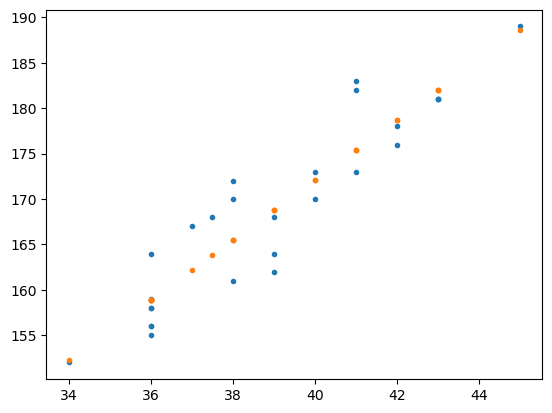

In [149]:
plt.plot(x,y,'.') # ploteando el conjunto de puntos
plt.plot(x,result.fittedvalues,'.') #Ploteando mi recta de regresion

In [150]:
## 5) usando el modelo para predecir la estatura de datos no observados en la muestra 
x_new= np.arange(0,60,1) # Secuencia de longitudes 
y_predicted = result.predict(sms.add_constant(x_new))

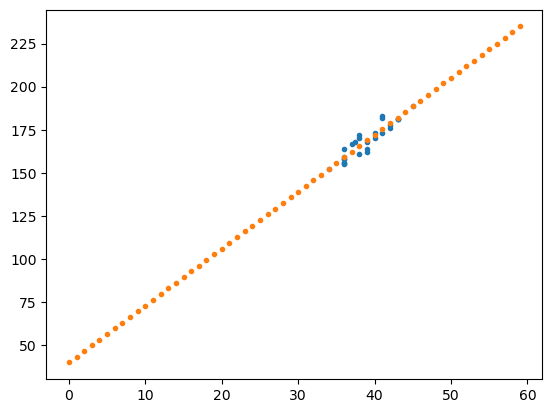

In [152]:
plt.plot(x,y,'.') # ploteando el conjunto de puntos

plt.plot(x_new,y_predicted,'.') #Ploteando mi recta de regresion

In [153]:
## 6) Interprestacion del modelo: 
## Recta de Regresion : Y = 40.0119 + 3.3033* x
#  Por cada aumento una unidad en x, es decir, aumentar 1 cm en longitud del pie, se espera que en promedio
#  la estatura aumente 3.033 cms

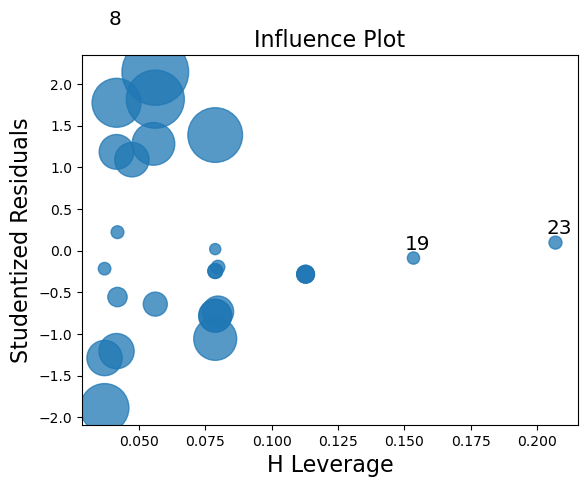

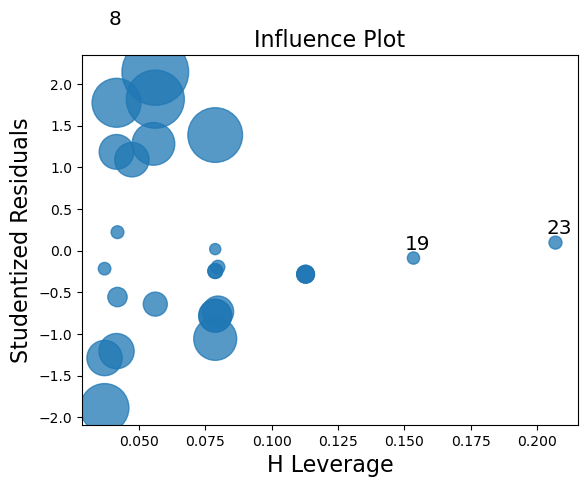

In [233]:
sms.graphics.influence_plot(result,criterion= "cook") # Grafico de influencia (buscar datos atipicos)

## Regresion Lineal Multiple

In [154]:
medifis.columns

Index(['Género\n(0 Mujer – 1 Hombre)',
       'Avance Académico\n(0 Estándar – 1 Profundización)', 'Estatura (cm)',
       'Peso (Kg)', 'Longitud\nPie (cm)', 'Longitud\nBrazo (cm)',
       'Anchura\nEspalda (cm)', 'Diámetro\nCráneo (cm)',
       'Longitud\nRodilla – Tobillo (cm)'],
      dtype='object')

In [155]:
y = medifis["Peso (Kg)"]
x = medifis.drop(["Peso (Kg)",
       "Diámetro\nCráneo (cm)",
       "Longitud\nRodilla – Tobillo (cm)",
       "Avance Académico\n(0 Estándar – 1 Profundización)",
       "Longitud\nBrazo (cm)",
       "Diámetro\nCráneo (cm)","Estatura (cm)",
       "Género\n(0 Mujer – 1 Hombre)"
       ], axis=1) # el orden SI IMPORTA segun la significancia

In [156]:
X = sms.add_constant(x) #Agregando el vector de 1's para crear la matriz de diseño
model = sms.OLS(y,X) ## Modelo de regresion lineal por minumos cuadrados 
result = model.fit()

In [157]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Peso (Kg)   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     46.19
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           5.91e-09
Time:                        21:21:09   Log-Likelihood:                -85.325
No. Observations:                  27   AIC:                             176.7
Df Residuals:                      24   BIC:                             180.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -87.2503     16.228     -5.376      0.000    -120.744     -53.756
Longitud
Pie (cm)        2.2130      0.687      3.219      0.004       0.794       3.632
Anchura
Espalda (cm)     1.4149      0.490      2.890      0.008       0.404       2.425
==============================================================================
Omnibus:                        0.966   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                0.951
Skew:                           0.384   Prob(JB):                        0.621
Kurtosis:                       2.493   Cond. No.                         842.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
#interpretacion :
## Beta_1 : longitud del pie -> si dejando fija la anchura de 
## la espalda, aumento en una unidad la longitud del pie
## el peso aumentará 2.2130 unidades y de la misma forma
## dejando fija la longitud del pie, si yo aumento una unidad
## en anchura de la espalda, el peso aumenta 1.4149 unidades

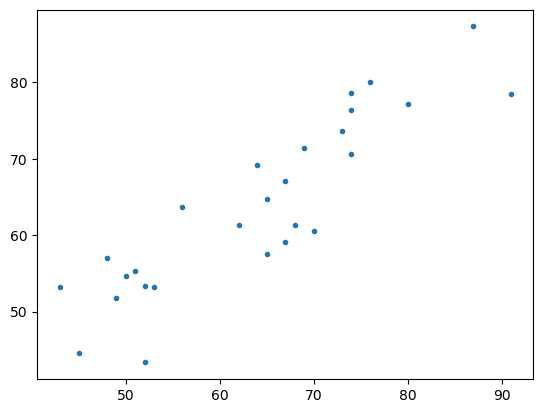

In [159]:
plt.plot(y,result.fittedvalues,'.')

In [160]:
## OTRO MODELO

In [161]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv", header=None)

<Axes: >

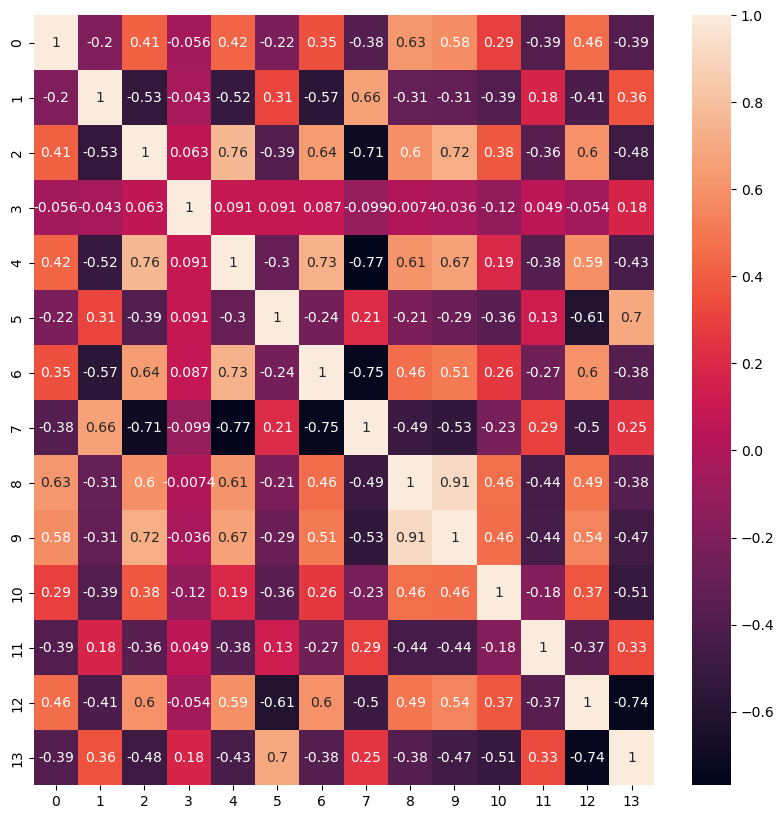

In [162]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True)

In [163]:
# revisamos correlaciones y para concluir algo grafico inicialmente y luego vamos a ver el modelo

In [164]:
#y = df.iloc[:,13] # eliminar el 6 y luego el 2 por la menos significativas (mas grandes P>|t|) 
y = df[13]
x = df.drop([13,6,2] , axis = 1)
X = sms.add_constant(x) ### Agregando el vector de unos para crear la matriz de diseño
model = sms.OLS(y, X) ### Creando el modelo de regresion lineal simple (OLS)
result = model.fit()
result.summary()

# revisando los supuestos: tenemos problemas en jarque-bera, durbin-watson

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     13   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 27 Sep 2023   Prob (F-statistic):          5.54e-137
Time:                        21:21:18   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
0             -0.1084      0.033     -3.307      0.001      -0.173      -0.044
1              0.0458      0.014      3.390      0.001       0.019       0.072
3              2.7187      0.854      3.183      0.002       1.040       4.397
4            -17.3760      3.535     -4.915      0.000     -24.322     -10.430
5              3.8016      0.406      9.356      0.000       3.003       4.600
7             -1.4927      0.186     -8.037      0.000      -1.858      -1.128
8              0.2996      0.063      4.726      0.000       0.175       0.424
9             -0.0118      0.003     -3.493      0.001      -0.018      -0.005
10            -0.9465      0.129     -7.334      0.000      -1.200      -0.693
11             0.0093      0.003      3.475      0.001       0.004       0.015
12            -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
y = df[13]
x = df.drop([13,6,2] , axis = 1)
X = sms.add_constant(x) ### Agregando el vector de unos para crear la matriz de diseño
model = sms.RLM(y, X) ### Creando el modelo del modelo robusto (la validacion de supuesto no es tan natrual,
###porque estamos penalizando individuos, porque no tenemos todos los residuales)
## usamos modelos rubusto cuando el simple despues de ajustar incumple suspuestos
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                     13   No. Observations:                  506
Model:                            RLM   Df Residuals:                      494
Method:                          IRLS   Df Model:                           11
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 27 Sep 2023                                         
Time:                        21:21:18                                         
No. Iterations:                    26                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.6009      3.819      5.656      0.000      14.116      29.086
0             -0.1042      0.025     -4.220      0.000      -0.153      -0.056
1              0.0382      0.010      3.747      0.000       0.018       0.058
3              1.6136      0.644      2.506      0.012       0.352       2.875
4            -12.5205      2.664     -4.699      0.000     -17.742      -7.298
5              4.7477      0.306     15.504      0.000       4.148       5.348
7             -1.0407      0.140     -7.435      0.000      -1.315      -0.766
8              0.2131      0.048      4.459      0.000       0.119       0.307
9             -0.0115      0.003     -4.524      0.000      -0.016      -0.007
10            -0.8050      0.097     -8.276      0.000      -0.996      -0.614
11             0.0105      0.002      5.223      0.000       0.007       0.014
12            -0.3940      0.036    -11.022      0.000      -0.464      -0.324
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [166]:
## Regression Ridge

In [176]:
y = df[13]
x = df.drop([13] , axis = 1)
X = sms.add_constant(x) ### Agregando el vector de unos para crear la matriz de diseño
model = sms.OLS(y, X) ### Creando el modelo de regresion lineal simple (OLS) PENALIZADO con RIDGE
### L1_wt = 0 implica que se monte la regresion Ridge, en caso que se defina como 1 estem onta regresion lasso
#result = model.fit_regularized(alpha= 0.1, L1_wt=0) #result = model.fit() -> OLS
result = model.fit_regularized(alpha= 1, L1_wt=0) #result = model.fit() -> OLS
# cuanto penalizar  -- calcular el modelo apra alphas grandes 

In [177]:
result.params

array([ 0.24200883, -0.08845896,  0.0889451 , -0.01612592,  0.23916202,
        0.10097107,  2.43405835,  0.06790389, -0.32087998,  0.13023371,
       -0.00629631,  0.21600882,  0.02395328, -0.6697601 ])

In [181]:
# como calcular el alpha ideal

In [182]:
df.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [183]:
data = df.values

In [184]:
y = df[13].values
X = df.drop([13] , axis = 1).values

In [188]:
## Definiendo el modelo
model = Ridge(alpha = 1.0) # para un alpha fijo (penalizacion quemado). y luego calculamos el mejor
#hacemos metodo de Cross valitadion cv
cv = RepeatedKFold(n_splits=10, n_repeats=3,random_state =47) #Estabilizar el calculo n_repeat
#Random_state manejar la misma semilla
scores = cross_val_score(model,X,y,cv=cv, scoring="neg_mean_absolute_error")

In [192]:
mean_absolute_Error = np.mean(-1*scores)
print("Error MAE :", mean_absolute_Error)

Error MAE : 3.394694859285458


In [194]:
#calculemos el mejor alpha

In [220]:
cv = RepeatedKFold(n_splits=10, n_repeats=3,random_state =47)
model = RidgeCV(alphas=np.arange(0.1,2,0.01),cv=cv, scoring="neg_mean_absolute_error") 
#Menor error en terminos neg_mean_absolute_error
model.fit(X,y)

RidgeCV(alphas=array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76,...
       1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52,
       1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63,
       1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74,
       1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85,
       1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96,
       1.97, 1.98, 1.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=47),
        scoring='neg_mean_absolute_error')

In [221]:
model.alpha_

0.4999999999999998

In [222]:
model.coef_

array([-1.05865684e-01,  4.70411564e-02,  2.25165173e-03,  2.61211652e+00,
       -1.34162609e+01,  3.84075720e+00, -3.14417004e-03, -1.41149067e+00,
        2.95989418e-01, -1.26863875e-02, -9.04760119e-01,  9.53768594e-03,
       -5.29832258e-01])

In [223]:
y = df[13].values
X = df.drop([13] , axis = 1).values
## Definiendo el modelo
model = Ridge(alpha = 0.5) 
cv = RepeatedKFold(n_splits=10, n_repeats=3,random_state =47) 
scores = cross_val_score(model,X,y,cv=cv, scoring="neg_mean_absolute_error")
mean_absolute_Error = np.mean(-1*scores)
print("Error MAE :", mean_absolute_Error)

Error MAE : 3.3923094253401738


$$\beta = (X^T)^{-1} X^T y$$

In [ ]:
#Matriz de diseño y matriz de respuesta
#Solucion matricial del modelo.